In [2]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [4]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito","Ativo","Salario","Saiu"]

In [ ]:
dataset

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [ ]:
agrupamento = dataset.groupby('Estado').size()
agrupamento

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

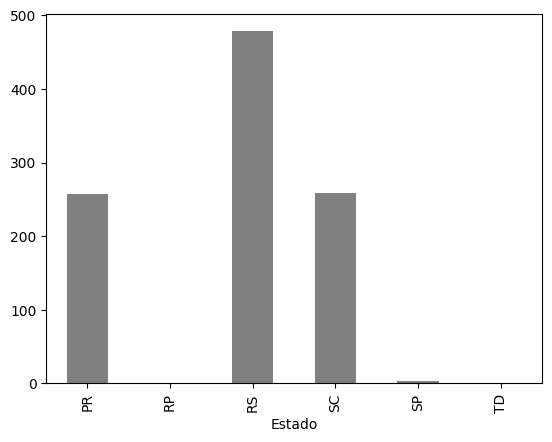

In [ ]:
agrupamento.plot.bar(color = 'gray')

In [ ]:
agrupamento_sexo = dataset.groupby('Genero').size()
agrupamento_sexo

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

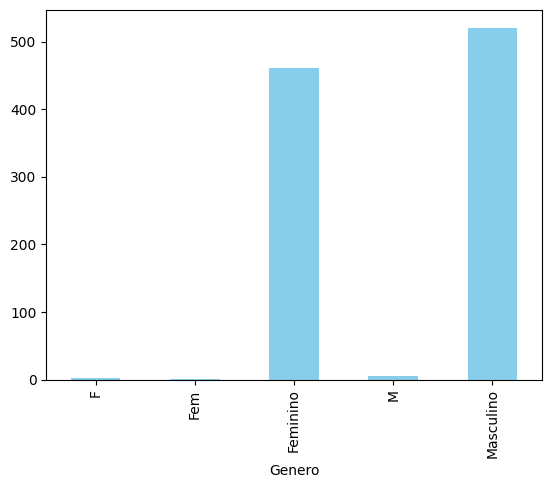

In [ ]:
agrupamento_sexo.plot.bar(color='skyblue')

In [ ]:
dataset[['Score']].describe()

,Score
count,999.000000
mean,648.621622
std,98.264219
min,376.000000
25%,580.000000
50%,653.000000
75%,721.000000
max,850.000000


Text(0.5, 1.0, 'Score')

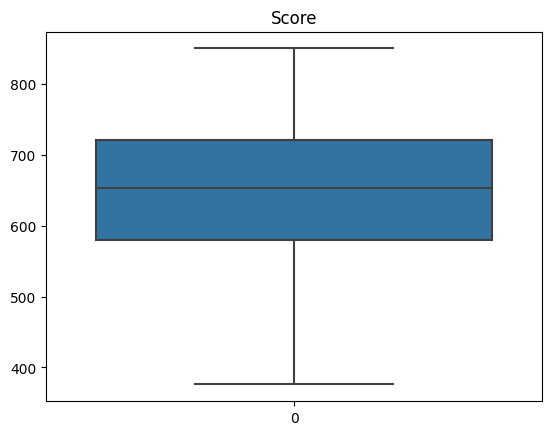

In [ ]:
srn.boxplot(dataset['Score']).set_title('Score')

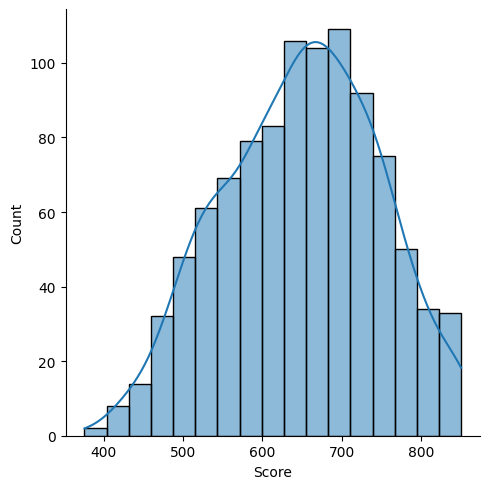

In [ ]:
srn.displot(dataset['Score'],kde=True)

In [ ]:
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

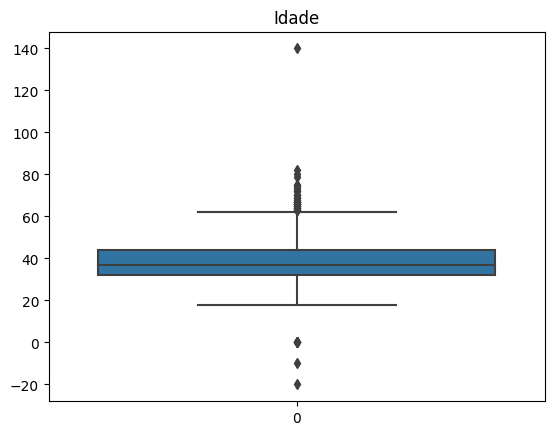

In [ ]:
srn.boxplot(dataset['Idade']).set_title('Idade')

In [ ]:
dataset['Idade'].std()

11.40191162740265

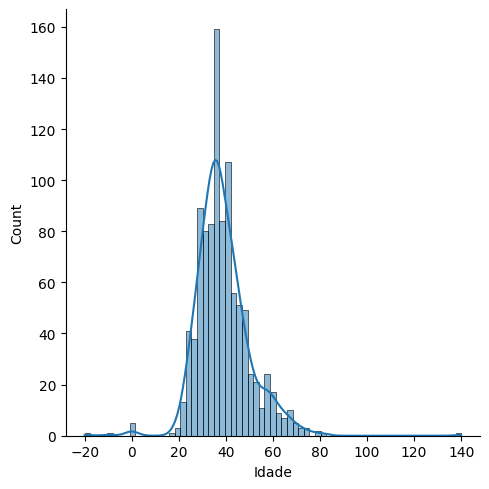

In [ ]:
srn.displot(dataset['Idade'], kde=True)

In [ ]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

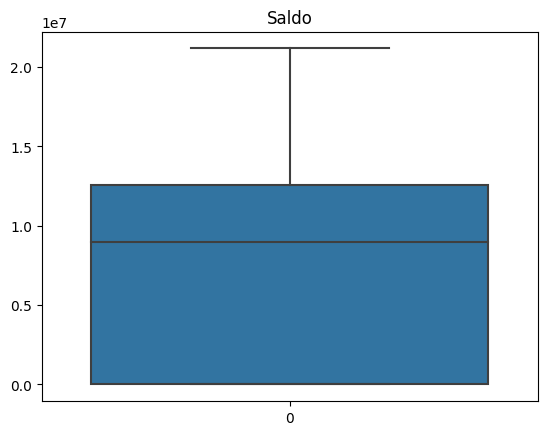

In [ ]:
srn.boxplot(dataset['Saldo']).set_title("Saldo")

<Axes: xlabel='Saldo', ylabel='Count'>

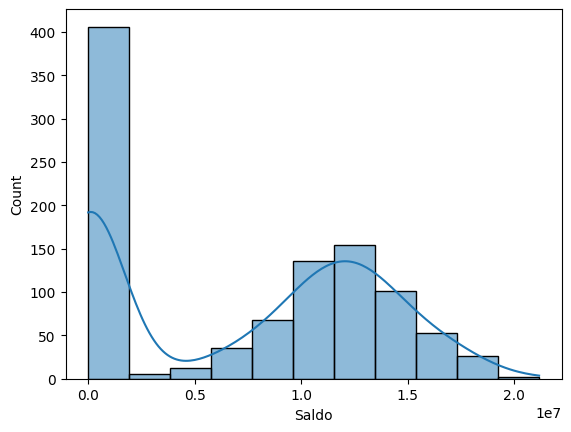

In [ ]:
srn.histplot(dataset['Saldo'], kde=True)

In [ ]:
#Dataset saldo
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Plot do salário')

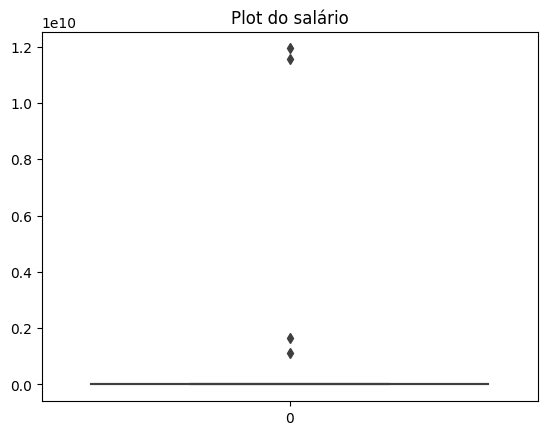

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Plot do salário')

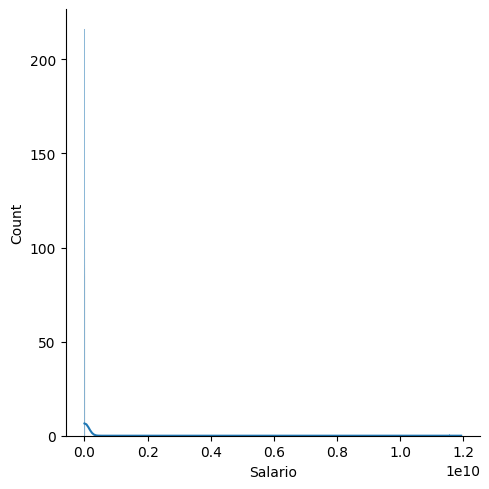

In [ ]:
srn.displot(dataset['Salario'], kde=True)

In [8]:
#Contando os valores NAN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [ ]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [9]:
mediana = sts.median(dataset['Salario'])
mediana
sts.median(dataset['Salario'])

70518.0

In [23]:
dataset['Salario'].fillna(mediana, inplace=True)

<Axes: >

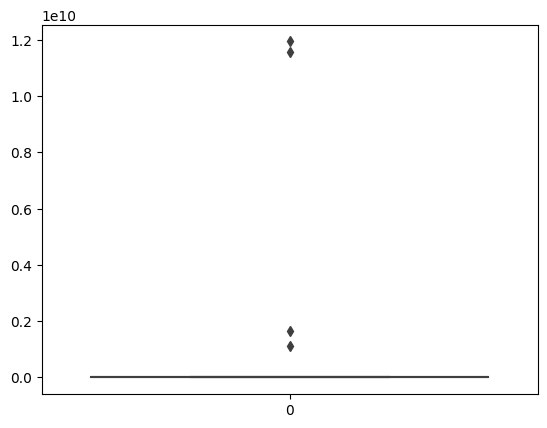

In [11]:
srn.boxplot(dataset['Salario'])

In [24]:
#Encontrando valores NA's
dataset['Salario'].isnull().sum()

0

In [13]:
dataset['Genero'].fillna('Masculino',inplace=True)

In [14]:
dataset['Genero'].isnull().sum()

0

In [15]:
dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'

In [16]:
dataset.loc[(dataset['Genero'] == 'F') | (dataset['Genero'] == 'Fem'), 'Genero'] = 'Feminino'

In [17]:
dataset['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

In [18]:
mediana_idade = sts.median(dataset['Idade'])
mediana_idade

37

In [19]:
dataset.loc[(dataset['Idade'] <= 0) | (dataset['Idade'] > 120), 'Idade'] = mediana_idade

In [22]:
#Removendo dados duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [21]:
dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

In [28]:
#Dados de idade tratados
dataset['Idade'].describe()

count    998.000000
mean      39.094188
std       10.314179
min       18.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

In [30]:
#Filtrando estados que não existem
agrupamento_estado = dataset.groupby(['Estado']).size()
agrupamento_estado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [31]:
#Atribuimos a moda a quem mais aparece
dataset.loc[dataset['Estado'].isin(['RP', 'SP', 'TD']),'Estado'] = 'RS'
agrupado = dataset.groupby(['Estado']).size()

In [32]:
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [33]:
#Limpando dados outliers. Usamos como base dois desvios padrões
desv = sts.stdev(dataset['Salario'])
desv

528988918.4679201

In [34]:
#Se algum valor atingir a métrica então substituimos os valores
dataset.loc[dataset['Salario'] >= 2 * desv] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [36]:
mediana = sts.median(dataset['Salario'])
mediana

8637195.5

In [37]:
#Substituindo os valores pela mediana
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario'] = mediana

In [38]:
dataset.loc[dataset['Salario'] >= 2 * desv, 'Salario']

Series([], Name: Salario, dtype: float64)

In [41]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [42]:
dataset.shape

(998, 12)